## **SURVEY ON USERS' NEEDS ABOUT INVESTING IN ALTCOIN**
### *CONDUCTED BY* **REMITANO**

- Link to the survey: [survey](https://remitano.typeform.com/to/jkKO5oZG)
- Link to the data (survey results): [results](https://remitano.typeform.com/to/jkKO5oZG)

In [2]:
# Import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
pd.set_option('max_columns', 100)

In [3]:
# Load the dataset into dataframe using the path leads to where the file is saved
remi = pd.read_excel('D:/Projects/Remi_test3/Test 1 Remitano survey 4_2020.xlsx')
remi.head()

,#,What age range do you have?,What is your gender?,Other,Where are you from?,Other.1,When did you join Remitano?,Buy Coins,Sell Coins,Withdraw coins,Deposit Coins,Swap,Invest,Read articles on Forum,Participate in minigame on Forum,Not using any of the above features,Used all,Have you know about Altcoins?,Name at least 1 Altcoin you have known 🧐,Altcoins,BTC,ETH,USDT,LTC,XRP,BCH,"If you could only choose 1 coin, which one would you invest? (choose only 1)","Because there are more risks (scam, fraud) than Bitcoin or top coin.",Because I got difficulty to own and store Altcoins.,Because of low liquidity.,Because I have a litte money.,Because I am lack of information about potential Altcoins.,Because the crypto exchange platforms I'm using don't have the Altcoins which I want to buy.,Because the budget of crypto market is very small in my portfolio.,Other.2,What will help you change your mind and be willing to invest Altcoin?,Why did you choose to invest Altcoins?,How many percentage of total budget are you going to invest in Altcoin? (type the number 0 - 100),What is your strategy in the altcoin investment ? (choose only 1),Other.3,Where do you store your altcoin? (choose only 1),Other.4,I got difficulties in owning and storing Altcoins.,The exchange is low liquidity.,I have low invest budget,I am lack of information about potential Altcoins.,The crypto exchange platforms I'm using don't have the Altcoins which I want to buy.,The budget of crypto market is very small in my portfolio.,"There are more risks (scam, fraud) than Bitcoin or top coin.",Other.5,Which is the most difficult thing? (choose 1),Other.6,"Name the most potential Altcoins you can't miss, you should invest now.",How did you buy Altcoins?,What is the most difficult thing about buying Altcoins?,"If you have Altcoin, how did you sell Altcoins?",What is the most difficult thing about selling Altcoin?,"In your opinion, what should Remitano do to help you trade Altcoins easily?","I can buy/sell all Altcoins at ""P2P exchange"".","I can ""Swap"" from BTC / ETH / UST to all Altcoins and vice versa.","I can ""Swap"" from my fiat-currency to all Altcoins and vice versa.","I can ""Invest"" in all Altcoins.","I can store and deposit/withdraw all altcoins in ""Remitano wallet"".",I can add my new Altcoin (which I create) on Remitano system.,"I can buy/sell all Altcoins at ""P2P exchange""..1","I can ""Swap"" from BTC / ETH / UST to all Altcoins and vice versa..1","I can ""Swap"" from my fiat-currency to all Altcoins and vice versa..1","I can ""Invest"" in all Altcoins..1","I can store and deposit/withdraw all altcoins in ""Remitano wallet""..1",I can add my new Altcoin (which I create) on Remitano system..1,"If there is only 1 vote, which one do you prefer?",Coinbas và Coinbase Pro,Bittrex,Changelly,Binance,Kraken,BitMEX,KuCoin,Huobi Pro,Bitpanda,Remitano,Other.7,Why did you choose this crypto exchange?,Start Date (UTC),Submit Date (UTC),Network ID
0,6w46ukq2s3q0hg17q06w46ukqyj8cz6a,> 40,Male,NaN,Malaysia,NaN,2019,Buy Coins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-03 01:58:34,2020-08-03 02:01:14,6f23d6341c
1,aon05iax15oiaocz08iyq9m6nw0bx0cz,> 40,Male,NaN,Malaysia,NaN,2017,Buy Coins,Sell Coins,Withdraw coins,Deposit Coins,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Tron (TRX),NaN,BTC,NaN,NaN,NaN,NaN,NaN,One of Altcoins I like,NaN,NaN,NaN,NaN,NaN,NaN,Because the budget of crypto market is very sm...,NaN,Daily ROI Investment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provide Trading Chart And Indicators,"I can buy/sell all Altcoins at ""P2P exchange"".",NaN,NaN,NaN,NaN,NaN,10.0,0.0,10.0,0.0,10.0,10.0,I can add my new Altcoin (which I create) on R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
remi.shape

(910, 86)

In [5]:
data = remi.copy()

### ***Replace appropriate data***

Some multiple choice questions that allow users to choose only one answer, including 'Other' option. That 'Other' will be filled and placed in new column named 'Other' right next to the column related to the question. The options those are null value in question column will be explained more details in the 'Other' columns.

Let's replace those null values by 'Other'.

In [6]:
# Define a function to convert appropriate null values in multiple choices questions those allow to choose 1 option into 'Other'
def convert_other(col_id, data=data):
    
    for col in col_id:
        other_idx = data[data.iloc[:, col+1].notnull()].index.tolist()
        data.iloc[other_idx, col] = 'Other'
    
    return data

data = convert_other(col_id=[2,4,38,40,50])
data.iloc[:,40].value_counts(dropna=False)

NaN                                                       790
Online wallets (For example: Blockchain )                  57
On the exchange platform                                   38
Do not store Altcoins, I change them to the main coin.     12
Cold wallets                                                9
Other                                                       4
Name: Where do you store your altcoin? (choose only 1), dtype: int64

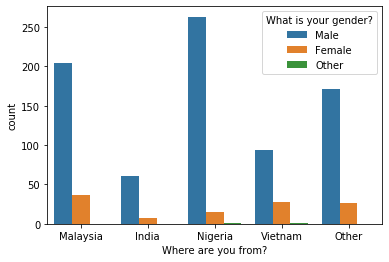

In [7]:
# Get the overview of data structure
sns.countplot(data = data, x = data.iloc[:,4].name, hue = data.iloc[:,2].name)

--> It seems most of our surveyors come from Nigeria and Malaysia, while the Male is majority.

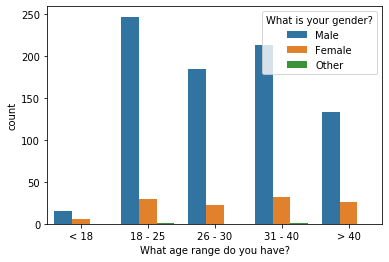

In [8]:
sns.countplot(data=data, x=data.iloc[:,1].name, hue=data.iloc[:,2].name,
              order = ['< 18', '18 - 25', '26 - 30', '31 - 40', '> 40'])

--> Our users mostly have age within 18-40.

### **TRANSFORM DATA FROM WIDE FORM TO LONG FORM**

In this dataset, there are some multiple choices questions where people can choose more than one options as their answers. If we unpivot all of them and replace into the original dataset, length of the dataset will be multiplied many times that leads to lower performance.

Instead of doing that, we will transform those options related to each question with each user ID (#) as a data point into a separate dataframe. Then, we can take advantage of data model function in Tableau to make deeper analysis, or join each dataframe into our original dataframe to see once a time.

In [9]:
# Define a function to transform data from long form to wide form then clean the df
def unpivot(start_idx=None, end_idx=None, columns=None, data=data, id_vars='#', var_name='variable', value_name='detail'):
    
    if columns == None:
        df = pd.melt(data,
                     id_vars = id_vars,
                     value_vars = data.iloc[:, start_idx:end_idx].columns.tolist(),
                     var_name = var_name,
                     value_name = value_name)
    else:
        df = pd.melt(data,
                     id_vars = id_vars,
                     value_vars = columns,
                     var_name = var_name,
                     value_name = value_name)
        
    df.dropna(subset=[value_name], inplace=True)
    other_idx = df[df[var_name].str.contains(r'Other', flags=re.I)].index.tolist()
    df.loc[other_idx, var_name] = 'Other'
    
    return df


unpivot(27,35).tail()

,#,variable,detail
7087,8fn1tm3u97atovgd70y8fn1td96kewte,Other,I want good income for me BTC
7099,a322sn346gtovla3228eu8faka5c7p6y,Other,Because market cap of altcoin alone is caparat...
7178,occpwdohwxymg54qca67voccpwdohvgj,Other,"Bitcoin is older than other coins, and it will..."
7183,ptyko54zk2pmyzuois0jlye7ptyko54z,Other,I love Bitcoin and do believe Bitcoin will ris...
7265,ze15v1k6kt6znjirojeze15v12i4ed1y,Other,Because people not to be trust


In [10]:
# Indentify the columns related to multiple choice questions that allow users to choose more than 1 option
remi_features_cols = data.iloc[:,7:17].columns.tolist()
invest_coins_cols = data.iloc[:,19:26].columns.tolist()
reason_not_invest_cols = data.iloc[:,27:35].columns.tolist()
difficulties_cols = data.iloc[:,42:50].columns.tolist()
expectation_cols = data.iloc[:,58:64].columns.tolist()
evaluate_cols = data.iloc[:,64:70].columns.tolist()
exchange_cols = data.iloc[:,71:82].columns.tolist()
exchange_cols

['Coinbas và Coinbase Pro',
 'Bittrex',
 'Changelly',
 'Binance',
 'Kraken',
 'BitMEX',
 'KuCoin',
 'Huobi Pro',
 'Bitpanda',
 'Remitano',
 'Other.7']

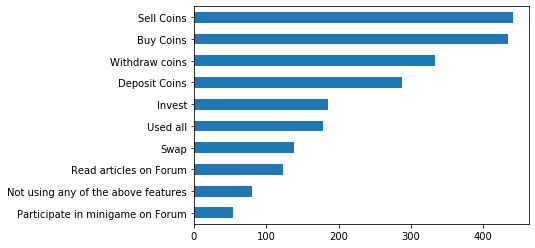

In [11]:
# Remitano Features
unpivot(7,17)['variable'].value_counts(dropna=False, ascending=True).plot.barh()

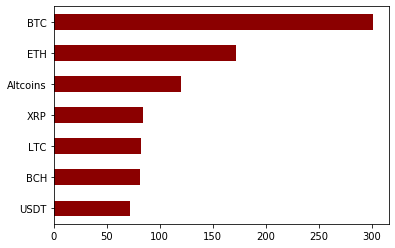

In [12]:
# Intention in investing Coins
unpivot(19,26)['variable'].value_counts(dropna=False, ascending=True).plot.barh(color='darkred')

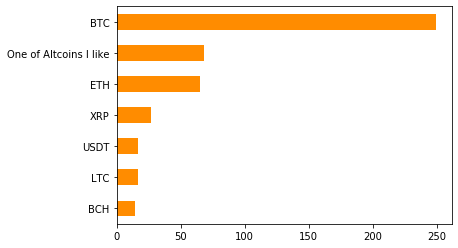

In [13]:
data.iloc[:,26].value_counts(dropna=True, ascending=True).plot.barh(color='darkorange')

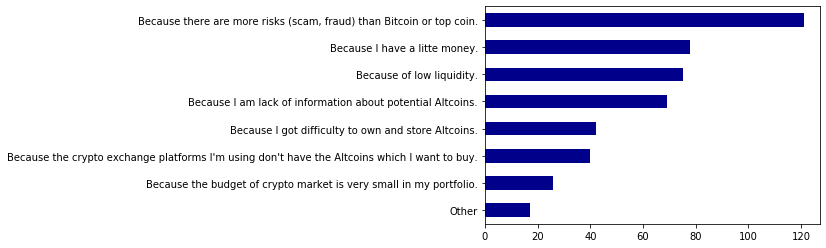

In [14]:
# Reason not invest in Altcoins
unpivot(27,35)['variable'].value_counts(dropna=True, ascending=True).plot.barh(color='darkblue')

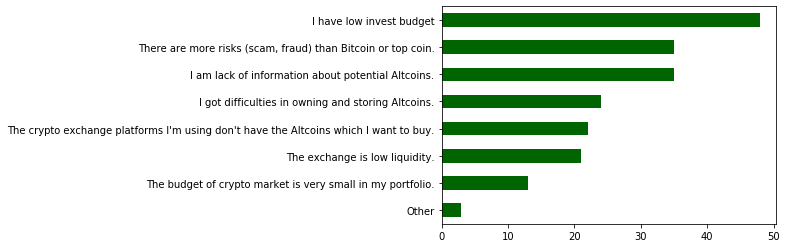

In [15]:
# Difficulties when investing in Altcoins
unpivot(42,50)['variable'].value_counts(dropna=True, ascending=True).plot.barh(color='darkgreen')

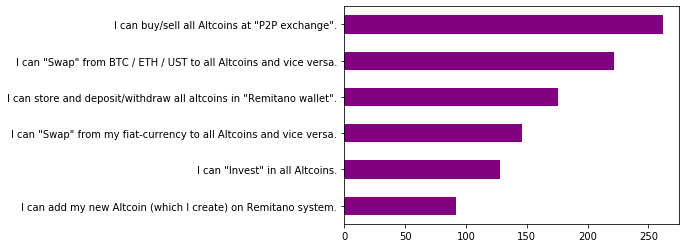

In [16]:
# Expectation to improve Remitano
unpivot(58,64)['variable'].value_counts(dropna=True, ascending=True).plot.barh(color='purple')

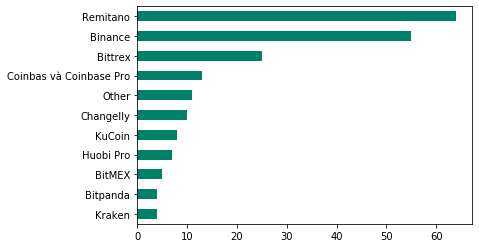

In [17]:
# Main exchange using to trade Altcoins
unpivot(71,82)['variable'].value_counts(dropna=True, ascending=True).plot.barh(colormap='summer')

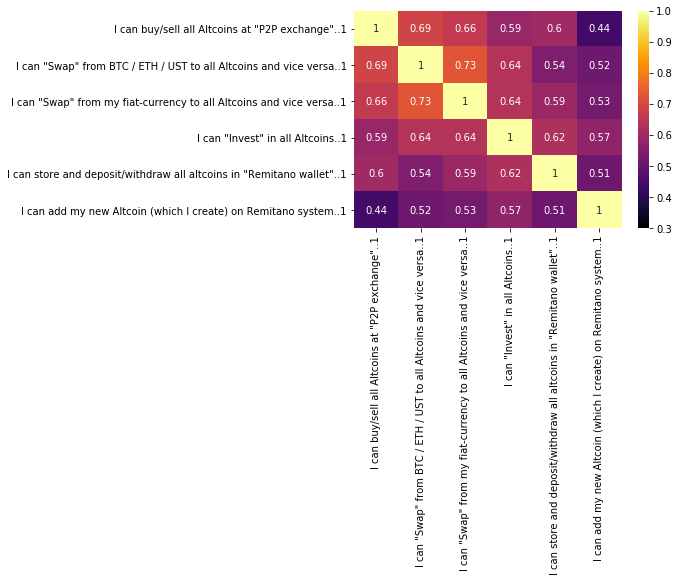

In [18]:
sns.heatmap(data.iloc[:,64:70].corr(), cmap='inferno', annot=True, vmin=.3)

### *REMOVE COLUMNS RELATED TO* **MULTIPLE CHOICE QUESTIONS** *TO MAKE A SECONDARY DATASET WITH EACH ROW AS EACH DATA POINT*

In [19]:
data.iloc[:,17].value_counts(dropna=False)

Yes    457
No     453
Name: Have you know about Altcoins?, dtype: int64

In [20]:
# Key column to evaluate if surveyor investing in ALtcoins or not -- "Altcoins"
data['investing_altcoins'] = data['Altcoins'].apply(lambda x: 'Yes' if x == 'Altcoins' else 'No')
data['investing_altcoins'].value_counts()

No     790
Yes    120
Name: investing_altcoins, dtype: int64

In [21]:
remove_cols = remi_features_cols + invest_coins_cols + reason_not_invest_cols + difficulties_cols + expectation_cols + evaluate_cols + exchange_cols
len(remove_cols)

56

In [22]:
data_2nd = data.drop(columns=remove_cols)
for i,col in enumerate(data_2nd.columns):
    print(i,col)

0 #
1 What age range do you have?
2 What is your gender?
3 Other
4 Where are you from?
5 Other.1
6 When did you join Remitano?
7 Have you know about Altcoins?
8 Name at least 1 Altcoin you have known 🧐
9 If you could only choose 1 coin, which one would you invest? (choose only 1)
10 What will help you change your mind and be willing to invest Altcoin?
11 Why did you choose to invest Altcoins?
12 How many percentage of total budget are you going to invest in Altcoin? (type the number 0 - 100)
13 What is your strategy in the altcoin investment ? (choose only 1)
14 Other.3
15 Where do you store your altcoin? (choose only 1)
16 Other.4
17 Which is the most difficult thing? (choose 1)
18 Other.6
19 Name the most potential Altcoins you can't miss, you should invest now.
20 How did you buy Altcoins?
21 What is the most difficult thing about buying Altcoins?
22 If you have Altcoin, how did you sell Altcoins?
23 What is the most difficult thing about selling Altcoin?
24 In your opinion, what sh

In [36]:
# Rename the columns in order to be more legible
new_cols = ['age','gender','gender_detail','country','country_detail','year_join','knowing_altcoin?','altcoin_you_know',
            'prior_invest','how_to_change_mind','why_invest','budget_perc','invest_strategy','strategy_detail',
            'prior_store','store_detail','prior_difficulty','difficulties_detail','potential_altcoin','how_to_buy',
            'difficult_buying','how_to_sell','difficult_selling','expect','prior_expect','why_this_exchange']
# test = data_2nd.copy()
for i in range(1,27):
    data_2nd.rename(columns={data_2nd.iloc[:,i].name : new_cols[i-1]}, inplace=True)
data_2nd.head()

,#,age,gender,gender_detail,country,country_detail,year_join,knowing_altcoin?,altcoin_you_know,prior_invest,how_to_change_mind,why_invest,budget_perc,invest_strategy,strategy_detail,prior_store,store_detail,prior_difficulty,difficulties_detail,potential_altcoin,how_to_buy,difficult_buying,how_to_sell,difficult_selling,expect,prior_expect,why_this_exchange,Start Date (UTC),Submit Date (UTC),Network ID,investing_altcoins
0,6w46ukq2s3q0hg17q06w46ukqyj8cz6a,> 40,Male,NaN,Malaysia,NaN,2019,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-03 01:58:34,2020-08-03 02:01:14,6f23d6341c,No
1,aon05iax15oiaocz08iyq9m6nw0bx0cz,> 40,Male,NaN,Malaysia,NaN,2017,Yes,Tron (TRX),One of Altcoins I like,Daily ROI Investment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provide Trading Chart And Indicators,I can add my new Altcoin (which I create) on R...,NaN,2020-07-15 04:17:25,2020-07-15 04:25:07,6a0087bdf7,No
2,rd4384zwi4f8qdc8zpkgrd4384zwsiqw,31 - 40,Male,NaN,Malaysia,NaN,2017,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-03 23:21:57,2020-07-03 23:24:19,58162a427b,No
3,5v23ormjjk7517pdic95v23r0v2l61l2,< 18,Male,NaN,India,NaN,2020,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-26 14:32:31,2020-06-26 14:33:10,368d15a9d1,No
4,1i9bju4z8s2gxicftve1i9bcwwsjzd6r,18 - 25,Male,NaN,India,NaN,2020,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-26 14:31:07,2020-06-26 14:32:22,368d15a9d1,No


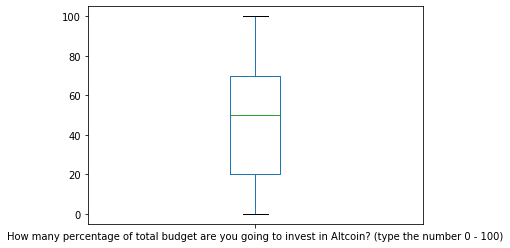

In [24]:
data.iloc[:,37].plot.box()

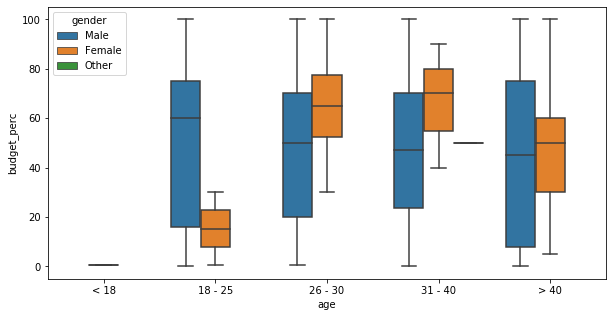

In [27]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data_2nd, x='age', y='budget_perc', hue='gender',
            order = ['< 18', '18 - 25', '26 - 30', '31 - 40', '> 40'])

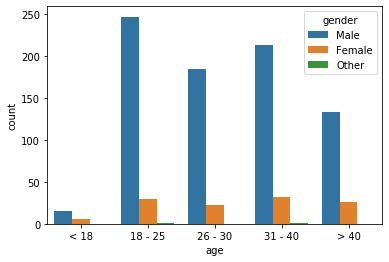

In [28]:
sns.countplot(data=data_2nd, x='age', hue='gender', order=['< 18', '18 - 25', '26 - 30', '31 - 40', '> 40'])

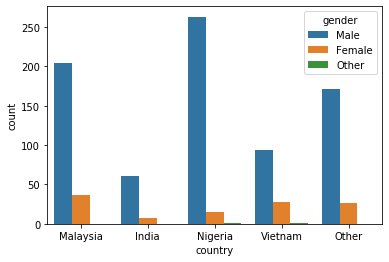

In [29]:
sns.countplot(data=data_2nd, x='country', hue='gender')

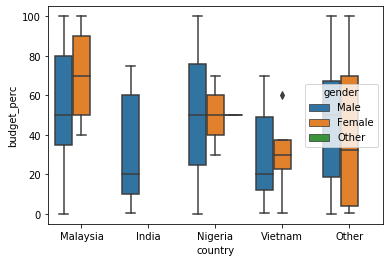

In [30]:
sns.boxplot(data=data_2nd, x='country', y='budget_perc', hue='gender')

### **LAST BUT NOT LEAST, EXPORT DATAFRAME INTO CSV FILE TO USE IN BI TOOLS FOR BETTER RESULTS**

In [31]:
unpivot(columns=expectation_cols)['variable'].value_counts()

I can buy/sell all Altcoins at "P2P exchange".                         262
I can "Swap" from BTC / ETH / UST to all Altcoins and vice versa.      222
I can store and deposit/withdraw all altcoins in "Remitano wallet".    176
I can "Swap" from my fiat-currency to all Altcoins and vice versa.     146
I can "Invest" in all Altcoins.                                        128
I can add my new Altcoin (which I create) on Remitano system.           92
Name: variable, dtype: int64

In [38]:
remi_features_data = unpivot(columns=remi_features_cols, var_name='features')
invest_coins_data = unpivot(columns=invest_coins_cols, var_name='coin_invest')
reason_not_invest_data = unpivot(columns=reason_not_invest_cols, var_name='reasons')
difficulties_data = unpivot(columns=difficulties_cols, var_name='difficulties')
expectation_data = unpivot(columns=expectation_cols, var_name='expectation')
evaluate_data = unpivot(columns=evaluate_cols, var_name='option')
exchange_data = unpivot(columns=exchange_cols, var_name='exchange')
exchange_data['exchange'].unique()

array(['Coinbas và Coinbase Pro', 'Bittrex', 'Changelly', 'Binance',
       'Kraken', 'BitMEX', 'KuCoin', 'Huobi Pro', 'Bitpanda', 'Remitano',
       'Other'], dtype=object)

In [33]:
exchange_data.tail()

,#,exchange,detail
9546,auaswfa9t27m3m3mclauas1hgtiba40e,Other,ExMarket
9600,mx1fnimldhbsiaj2mx1fsr5j27x2l8kf,Other,STEX
9751,796jyxs4xb11yqw7892d79w6i0c45wmn,Other,ExMarkets
9778,6mor7pf58yzxnj20grpp6mor7pf5aol6,Other,Blockchain
9923,4up3yox2vrf9ohej9ha5wnr4up3yox21,Other,coinomi


In [39]:
# Export the data related to the multiple choices questions and evaluate question
# remi_features_data.to_csv('remitano_features.csv', sep=',', header=True, index=False)
# invest_coins_data.to_csv('invest_coins.csv', index=False)
# reason_not_invest_data.to_csv('reason_not_invest.csv', index=False)
# difficulties_data.to_csv('difficulties_in_trading.csv', index=False)
# expectation_data.to_csv('expectation.csv', index=False)
# evaluate_data.to_csv('evaluate.csv', index=False)
# exchange_data.to_csv('exchange.csv', index=False)

In [156]:
# Export the secondary data to take advantage of data model in BI tools
# data_2nd.to_csv('secondary_data.csv', index=False)

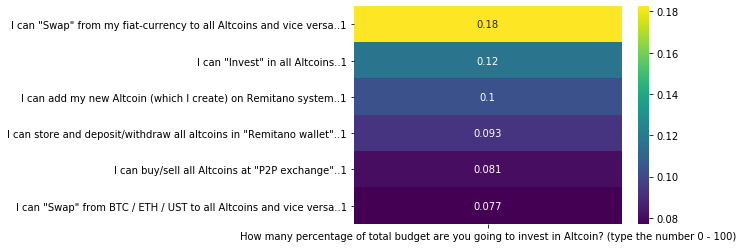

In [74]:
correlate = data.iloc[:, [37, 64, 65, 66, 67, 68, 69]].corr().iloc[:,[0]]
sns.heatmap(correlate.sort_values(by = correlate.iloc[:,0].name, ascending=False)[1:],
            cmap='viridis', annot=True)

In [76]:
evaluate_merge = data_2nd.merge(evaluate_data, on='#', how='left')
evaluate_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 0 to 3194
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   #                    3195 non-null   object        
 1   age                  3195 non-null   object        
 2   gender               3195 non-null   object        
 3   gender_detail        7 non-null      object        
 4   country              3195 non-null   object        
 5   country_detail       683 non-null    object        
 6   year_join            3195 non-null   int64         
 7   knowing_altcoin?     3195 non-null   object        
 8   altcoin_you_know     2742 non-null   object        
 9   prior_invest         2742 non-null   object        
 10  how_to_change_mind   2022 non-null   object        
 11  why_invest           720 non-null    object        
 12  budget_perc          720 non-null    float64       
 13  invest_strategy      720 non-null

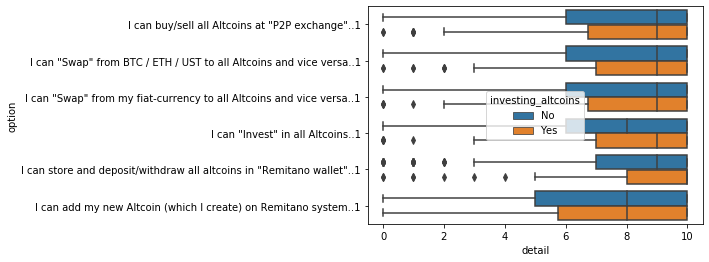

In [82]:
sns.boxplot(data=evaluate_merge, y='option', x='detail', hue='investing_altcoins')

In [83]:
for i,col in enumerate(data.columns):
    print(i,col)

0 #
1 What age range do you have?
2 What is your gender?
3 Other
4 Where are you from?
5 Other.1
6 When did you join Remitano?
7 Buy Coins
8 Sell Coins
9 Withdraw coins
10 Deposit Coins
11 Swap
12 Invest
13 Read articles on Forum
14 Participate in minigame on Forum
15 Not using any of the above features
16 Used all
17 Have you know about Altcoins?
18 Name at least 1 Altcoin you have known 🧐
19 Altcoins
20 BTC
21 ETH
22 USDT
23 LTC
24 XRP
25 BCH
26 If you could only choose 1 coin, which one would you invest? (choose only 1)
27 Because there are more risks (scam, fraud) than Bitcoin or top coin.
28 Because I got difficulty to own and store Altcoins.
29 Because of low liquidity.
30 Because I have a litte money.
31 Because I am lack of information about potential Altcoins.
32 Because the crypto exchange platforms I'm using don't have the Altcoins which I want to buy.
33 Because the budget of crypto market is very small in my portfolio.
34 Other.2
35 What will help you change your mind and 